In [1]:
from PIL import Image

from fdray import (
    Background,
    Box,
    Camera,
    Color,
    ColorMap,
    Include,
    LightSource,
    Pigment,
    PigmentMap,
    Renderer,
    Scene,
)


In [10]:
def scene(*attrs) -> Scene:
    camera = Camera(30, 20, view_scale=2)
    return Scene(
        Include("colors.inc"),
        camera,
        LightSource(camera.location, "white"),
        Background("white", alpha=0.1),
        Box((-1, -1, -1), (1, 1, 1), *attrs),
    )


def render(*attrs) -> Image.Image:
    renderer = Renderer(width=300, height=300)
    array = renderer.render(scene(*attrs))
    return Image.fromarray(array)

In [11]:
print(scene(Color("red")))

#version 3.7;
global_settings { assumed_gamma 1 }
#include "colors.inc"
camera { location <16.276, 9.3969, 6.8404> look_at <0, 0, 0> direction <16.276, 9.3969, 6.8404> right <2.3094, -4, -0> up <-1.0261, -0.5924, 3.2552> sky <-0.2962, -0.17101, 0.93969> }
light_source { <16.276, 9.3969, 6.8404> color rgb <1, 1, 1> }
background { rgbt <1, 1, 1, 0.9> }
box { <-1, -1, -1>, <1, 1, 1> pigment { rgb <1, 0, 0> } }


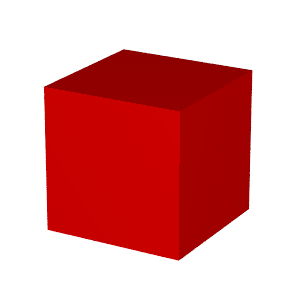

In [12]:
render(Color("red"))

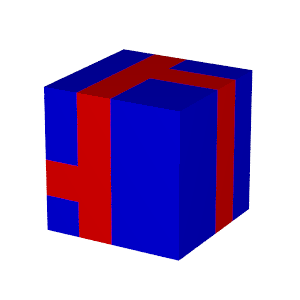

In [13]:
render(Pigment("brick", "Red", "Blue"))

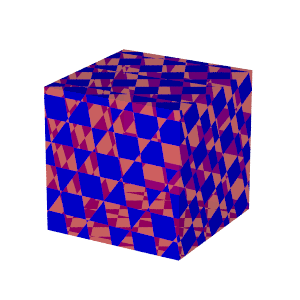

In [15]:
p = Pigment("checker", Color("red", 0.5), Color("blue")).rotate(10, 20, 30).scale(0.3)
render(p)

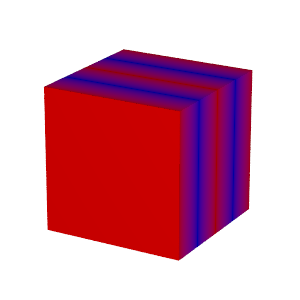

In [16]:
p = Pigment("gradient x", ColorMap((0, "red"), (0.5, "blue"), (1, "red")))
render(p)

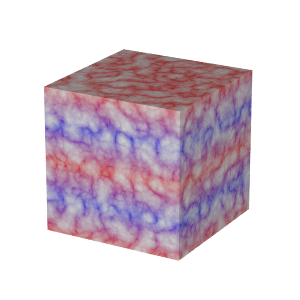

In [17]:
a = Pigment("granite", ColorMap((0, "red"), (0.9, "white")))
b = Pigment("granite", ColorMap((0, "blue"), (0.9, "white")))
p = Pigment("gradient z", PigmentMap((0, a), (0.5, b), (1, a)))
render(p)

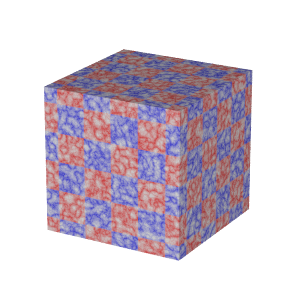

In [18]:
render(Pigment("checker", a, b).scale(0.4))